Dataset Loaded Successfully
  Property_ID  Area  Bedrooms  Bathrooms  Age     Location Property_Type  \
0    PROP0001  3712         4          3   36        Rural         House   
1    PROP0002  1591         4          1   35       Suburb         House   
2    PROP0003  1646         4          3   20        Rural         Villa   
3    PROP0004  4814         1          2   13  City Center         Villa   
4    PROP0005   800         4          2   38       Suburb     Apartment   

      Price  
0  22260000  
1  16057500  
2  12730000  
3  50840000  
4  10650000  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Property_ID    300 non-null    object
 1   Area           300 non-null    int64 
 2   Bedrooms       300 non-null    int64 
 3   Bathrooms      300 non-null    int64 
 4   Age            300 non-null    int64 
 5   Locati

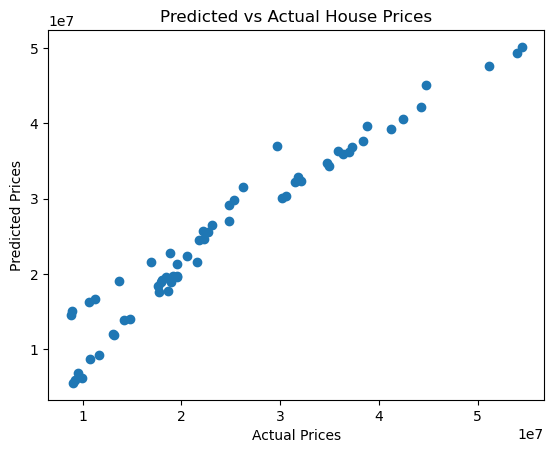


DECISION TREE R² SCORE: 0.935648766050682

RANDOM FOREST RESULTS
MAE : 1493949.1666666667
MSE : 4120314726645.8335
R²  : 0.9710688215749718

IMPORTANT FEATURES:
Area                   0.693187
Location_Rural         0.201724
Location_Suburb        0.073616
Bedrooms               0.019140
Age                    0.008199
Bathrooms              0.002207
Property_Type_Villa    0.001143
Property_Type_House    0.000783
dtype: float64

Sample House Predicted Price: [7807100.]


In [13]:
# 1. IMPORT REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# 2. LOAD DATASET
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\house_prices (2).csv")

print("Dataset Loaded Successfully")
print(df.head())


# 3. DATA UNDERSTANDING

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())


# 4. DATA PREPROCESSING (ERROR FIXED)


# Drop ID column (VERY IMPORTANT)
df.drop('Property_ID', axis=1, inplace=True)

# Handle missing numeric values
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical columns
df = pd.get_dummies(df, columns=['Location', 'Property_Type'], drop_first=True)

print("\nColumns after preprocessing:")
print(df.columns)

# 5. FEATURE SELECTION

X = df.drop('Price', axis=1)
y = df['Price']

# Ensure all features are numeric (safety check)
print("\nFeature data types:")
print(X.dtypes)

# 6. TRAIN–TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 7. LINEAR REGRESSION MODEL (ERROR RESOLVED)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)


# 8. MODEL EVALUATION – LINEAR REGRESSION

lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("\nLINEAR REGRESSION RESULTS")
print("MAE :", lr_mae)
print("MSE :", lr_mse)
print("R²  :", lr_r2)


# 9. VISUALIZATION (PREDICTIONS vs ACTUAL)

plt.figure()
plt.scatter(y_test, lr_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.savefig("predictions_vs_actual.png")
plt.show()


# 10. DECISION TREE REGRESSOR

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)
dt_r2 = r2_score(y_test, dt_predictions)

print("\nDECISION TREE R² SCORE:", dt_r2)


# 11. RANDOM FOREST REGRESSOR (BEST MODEL)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("\nRANDOM FOREST RESULTS")
print("MAE :", rf_mae)
print("MSE :", rf_mse)
print("R²  :", rf_r2)


# 12. FEATURE IMPORTANCE

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\nIMPORTANT FEATURES:")
print(feature_importance)

# 13. SAMPLE HOUSE PRICE PREDICTION
sample_house = X_test.iloc[0:1]
predicted_price = rf_model.predict(sample_house)

print("\nSample House Predicted Price:", predicted_price)